## Setup

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import random

import matplotlib.pyplot as plt

import tqdm

## Load data

In [4]:
dataset_pd = pd.read_excel('./dataset/book1.xlsx')
dataset_pd

,ID,DRAW1,DRAW2,DRAW3
0,4560,8851,3028,2305
1,4559,7061,6631,9856
2,4558,3054,1014,7914
3,4557,7474,7645,4388
4,4556,8772,1822,1304
...,...,...,...,...
95,4465,2541,6761,4485
96,4464,8252,4940,2871
97,4463,6877,600,5340
98,4462,2404,3739,8614


In [5]:
np.unique(dataset_pd['DRAW1'].to_numpy(), return_counts=True)

(array([  42,  117,  149,  161,  448,  451,  459,  474,  629,  712,  731,
         944, 1066, 1067, 1115, 1120, 1176, 1180, 1275, 1401, 1481, 1634,
        1691, 1848, 1973, 2236, 2287, 2296, 2314, 2363, 2404, 2505, 2541,
        2637, 2900, 3054, 3114, 3242, 3568, 3575, 3580, 3581, 3636, 3920,
        4139, 4151, 4379, 4438, 4688, 4717, 4731, 4783, 4871, 4945, 5224,
        5722, 5827, 6084, 6104, 6225, 6267, 6481, 6494, 6518, 6668, 6735,
        6846, 6877, 6949, 6991, 7026, 7041, 7047, 7061, 7113, 7172, 7474,
        7690, 7708, 7852, 7981, 8040, 8184, 8252, 8254, 8291, 8355, 8446,
        8476, 8772, 8851, 8903, 8912, 9148, 9270, 9294, 9327, 9364, 9738,
        9888]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,

In [6]:
np.unique(dataset_pd['DRAW2'].to_numpy(), return_counts=True)

(array([  19,   90,  159,  257,  291,  351,  355,  437,  524,  548,  589,
         600,  719,  945,  961, 1014, 1279, 1330, 1365, 1512, 1822, 1853,
        1929, 1932, 1933, 2030, 2048, 2262, 2267, 2276, 2613, 2851, 2956,
        2978, 2994, 3022, 3028, 3197, 3663, 3722, 3739, 3757, 3776, 3919,
        3958, 4049, 4204, 4410, 4487, 4548, 4872, 4898, 4899, 4940, 4963,
        5526, 5553, 5574, 5584, 5690, 5830, 5848, 5878, 5950, 5954, 5991,
        6017, 6055, 6089, 6367, 6631, 6761, 6941, 7031, 7187, 7396, 7431,
        7518, 7591, 7628, 7645, 7718, 7943, 7964, 8161, 8305, 8393, 8422,
        8501, 8703, 8751, 8985, 8994, 9103, 9155, 9182, 9196, 9600, 9611,
        9848]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,

In [8]:
np.unique(dataset_pd['DRAW3'].to_numpy(), return_counts=True)

(array([ 423,  484,  609,  631,  961, 1044, 1304, 1425, 1472, 1507, 1644,
        1874, 2305, 2590, 2678, 2739, 2802, 2810, 2818, 2871, 2999, 3066,
        3259, 3366, 3390, 3462, 3541, 3661, 3792, 3934, 4032, 4255, 4376,
        4381, 4387, 4388, 4463, 4485, 4513, 4541, 4590, 4667, 4748, 4903,
        5340, 5511, 5559, 5588, 5618, 5718, 5809, 6051, 6221, 6273, 6292,
        6510, 6705, 6891, 6916, 6970, 7036, 7102, 7167, 7175, 7306, 7356,
        7442, 7512, 7523, 7526, 7566, 7608, 7686, 7746, 7765, 7914, 7974,
        8042, 8191, 8310, 8413, 8436, 8544, 8577, 8614, 8630, 8695, 8732,
        8762, 8859, 8936, 8991, 9014, 9442, 9446, 9578, 9738, 9856, 9958]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
draw1 = dataset_pd['DRAW1'].to_numpy()
draw2 = dataset_pd['DRAW2'].to_numpy()
draw3 = dataset_pd['DRAW3'].to_numpy()
draws = np.concatenate((draw1, draw2, draw3))

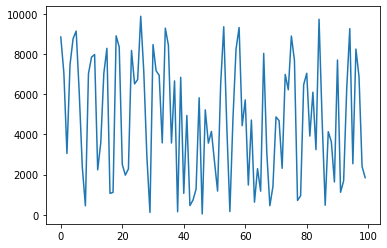

In [10]:
plt.plot(draw1)

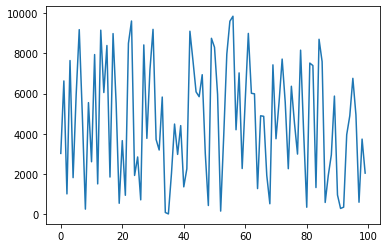

In [11]:
plt.plot(draw2)

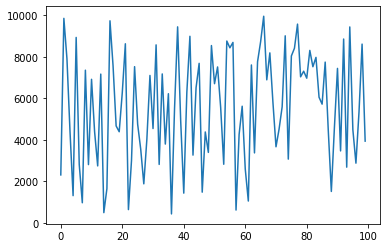

In [12]:
plt.plot(draw3)

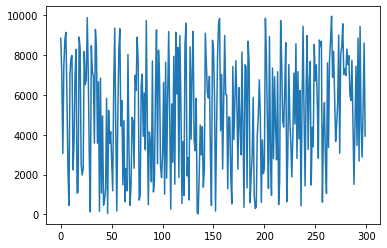

In [13]:
plt.plot(draws)

In [14]:
dataset_pd[(dataset_pd['DRAW1'] == dataset_pd['DRAW2']) & (dataset_pd['DRAW1'] == dataset_pd['DRAW3'])]

,ID,DRAW1,DRAW2,DRAW3


In [15]:
merged_draws = np.hstack((draw1.reshape(-1,1), draw2.reshape(-1,1), draw3.reshape(-1,1)))
merged_draws[0]

array([8851, 3028, 2305])

In [16]:
unq, count = np.unique(draws, axis=0, return_counts=True)
unq[count > 1], count[count > 1]

(array([ 961, 2810, 9738]), array([2, 2, 2]))

In [17]:
unq, count = np.unique(merged_draws, axis=0, return_counts=True)
unq[count > 1]

array([], shape=(0, 3), dtype=int64)

## Check if series is random

### Extreme points criterion

In [22]:
def is_random_by_extreme_points(u):
    '''
    Params: 
        u: series
    Return:
        float: statistics
        boolean: True - series is random, False - series has cycles or seasonality
        
    '''
    u_a2 = 1.96
    n = len(u)
    E = 0
    
    for i in range(1, n-1, 1):
        if (u[i-1] < u[i] > u[i+1]) or (u[i-1] > u[i] < u[i+1]):
            E += 1
            
    M_E = 2*(n-2)/3
    D_E = (16*n-29)/90
    
    stat = (E-M_E)/(D_E**0.5)
    
    return stat, abs(stat) <= u_a2

def output_is_random_by_extreme_points(u):
    stat, res = is_random_by_extreme_points(u)
    output = 'series is random'
    if not res:
        output = 'series has cycles or seasonality'
    return f'{output}, stat={stat:0.4f}'

In [35]:
print(f'''
====== Extreme points criteria ======
DRAW1: {output_is_random_by_extreme_points(draw1)}
DRAW2: {output_is_random_by_extreme_points(draw2)}
DRAW3: {output_is_random_by_extreme_points(draw3)}
DRAWS: {output_is_random_by_extreme_points(draws)}
''')


====== Extreme points criteria ======
DRAW1: series is random, stat=-1.2765
DRAW2: series is random, stat=-0.5585
DRAW3: series is random, stat=0.3989
DRAWS: series is random, stat=-0.9156



### Foster-Stuart criteria

In [27]:
def is_random_by_foster_stuart(u):
    '''
    Params: 
        u: series
    Return:
        float: statistics of changing mean
        boolean: True - no tendency of changing mean, False - series has tendency of changing mean
        float: statistics of changing variance
        boolean: True - no tendency of changing variance, False - series has tendency of changing variance       
    '''
    u_a2 = 1.96
    n = len(u)
    L = 0
    M = 0
    
    for i in range(1, n, 1):
        is_l = True
        is_m = True
        
        for j in range(0, i, 1): 
            if u[i] >= u[j]:
                is_l = False
                break
                
        for j in range(0, i, 1): 
            if u[i] <= u[j]:
                is_m = False
                break
        
        if is_l: L += 1
        if is_m: M += 1

    M_D = 0
    D_D = 2 * np.sum(1 / np.arange(2, n+1))
    M_S = D_D
    D_S = D_D - 4* np.sum(1 / np.arange(2, n+1)**2)
    
    stat1 = (M - L - M_D) / (D_D**0.5)
    stat2 = (M + L - M_S) / (D_S**0.5)
    
    return stat1, abs(stat1) <= u_a2, stat2, abs(stat2) <= u_a2

def output_is_random_by_foster_stuart(u):
    stat1, res1, stat2, res2 = is_random_by_foster_stuart(u)
    output1 = 'no tendency of changing mean'
    output2 = 'no tendency of changing variance'
    if not res1:
        output1 = 'series has tendency of changing mean'
    if not res2:
        output2 = 'series has tendency of changing variance'
        
    return f'{output1}, stat={stat1:0.4f}; {output2}, stat={stat2:0.4f}'

In [40]:
print(f'''
==================================== Foster-Stuart criteria =====================================
DRAW1: {output_is_random_by_foster_stuart(draw1)}
DRAW2: {output_is_random_by_foster_stuart(draw2)}
DRAW3: {output_is_random_by_foster_stuart(draw3)}
DRAWS: {output_is_random_by_foster_stuart(draws)}
''')


==================================== Foster-Stuart criteria =====================================
DRAW1: no tendency of changing mean, stat=-1.3822; no tendency of changing variance, stat=-0.1551
DRAW2: no tendency of changing mean, stat=0.3456; no tendency of changing variance, stat=0.2588
DRAW3: no tendency of changing mean, stat=-0.6911; no tendency of changing variance, stat=-0.9831
DRAWS: no tendency of changing mean, stat=-1.2306; no tendency of changing variance, stat=-0.1999



### Spearman's rank correlation coefficient

In [29]:
def is_random_by_spearman(u):
    '''
    Params: 
        u: series
    Return:
        float: statistics
        boolean: True - series is random, False - series has trend
        
    '''
    u_a2 = 1.96
    n = len(u)
    
    V = 0
    for i in range(n-1):
        for j in range(i+1, n, 1):
            if u[i] < u[j]:
                h = 1
            elif u[i] == u[j]:
                h = 0.5
            else:
                h = 0
            V += (j - i) * h
            
    tau = 1 - 12*V/(n**3 - n)
    M_tau = 0
    D_tau = 1/(n-1)
    stat = tau / (D_tau**0.5)
    
    return stat, abs(stat) <= u_a2

def output_is_random_by_spearman(u):
    stat, res = is_random_by_spearman(u)
    output = 'series is random'
    if not res:
        output = 'series has trend'
    return f'{output}, stat={stat:0.4f}'

In [42]:
print(f'''
=== Spearman's rank correlation coefficient ===
DRAW1: {output_is_random_by_spearman(draw1)}
DRAW2: {output_is_random_by_spearman(draw2)}
DRAW3: {output_is_random_by_spearman(draw3)}
DRAWS: {output_is_random_by_spearman(draws)}
''')


=== Spearman's rank correlation coefficient ===
DRAW1: series is random, stat=1.5625
DRAW2: series is random, stat=0.9467
DRAW3: series is random, stat=-1.7947
DRAWS: series is random, stat=-1.6462



## Identify distribution

### Histograms

In [44]:
def bins(n):
    if n < 100:
        b = int(n**0.5)
    else:
        b = int(n**0.33)
        
    if b%2 == 0:
        return b - 1
    else:
        return b

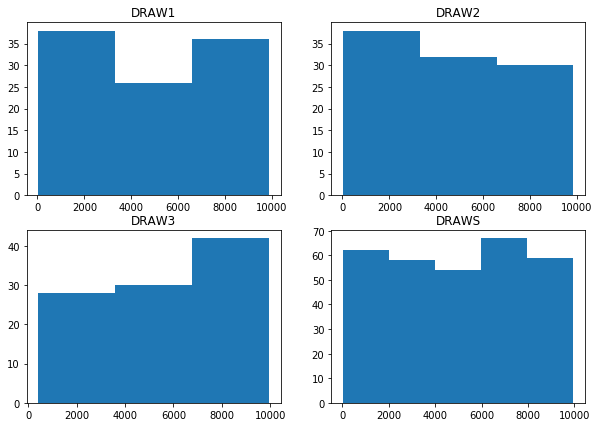

In [51]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
ax[0][0].hist(draw1, bins(len(draw1)))
ax[0][1].hist(draw2, bins(len(draw2)))
ax[1][0].hist(draw3, bins(len(draw3)))
ax[1][1].hist(draws, bins(len(draws)))

ax[0][0].set_title('DRAW1')
ax[0][1].set_title('DRAW2')
ax[1][0].set_title('DRAW3')
ax[1][1].set_title('DRAWS')

plt.show()

### Skew and kurtosis

A - skew  
E - kurtosis

Normal distribution: A=0, E=0  
Exponential distribution: A=2, E=6  
Uniform distribution: A=0, E=-1.2  

In [55]:
def check_A_E(x, A, E):
    A_eval = stats.skew(x)
    E_eval = stats.kurtosis(x)
    
    n = len(x)
    var_A = (6*(n-2)/((n+1)*(n+3)))**0.5
    var_E = (24*n*(n-2)*(n-3)/((n+1)*(n+1)*(n+3)*(n+5)))**0.5
    
    u_a2 = 1.96
    stat_A = (A_eval - A)/var_A
    stat_E = (E_eval - E)/var_E
    
    return A_eval, abs(stat_A) <= u_a2, E_eval, abs(stat_E) <= u_a2

def output_check_A_E(x, A, E):
    A_eval, res_A, E_eval, res_E = check_A_E(x, A, E)
    output_A = f'A={A}' if res_A else f'A!={A}'
    output_E = f'E={E}' if res_E else f'E!={A}'
    return f'{output_A} (A^={A_eval:0.4f}); {output_E} (E^={E_eval:0.4f})'

In [57]:
print(f'''
DRAW1: {output_check_A_E(draw1, 0, -1.2)}
DRAW2: {output_check_A_E(draw2, 0, -1.2)}
DRAW3: {output_check_A_E(draw3, 0, -1.2)}
DRAWS: {output_check_A_E(draws, 0, -1.2)}
''')


DRAW1: A=0 (A^=0.0034); E=-1.2 (E^=-1.3624)
DRAW2: A=0 (A^=0.0489); E=-1.2 (E^=-1.2299)
DRAW3: A=0 (A^=-0.2134); E=-1.2 (E^=-1.1058)
DRAWS: A=0 (A^=-0.0742); E=-1.2 (E^=-1.2470)



### Probability grids

In [114]:
def plot_prob_grids(x):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    stats.probplot(x, dist=stats.norm, plot=ax[0])
    stats.probplot(x, dist=stats.uniform, plot=ax[1])   
    ax[0].set_title('Normal distribution')
    ax[1].set_title('Uniform distribution')

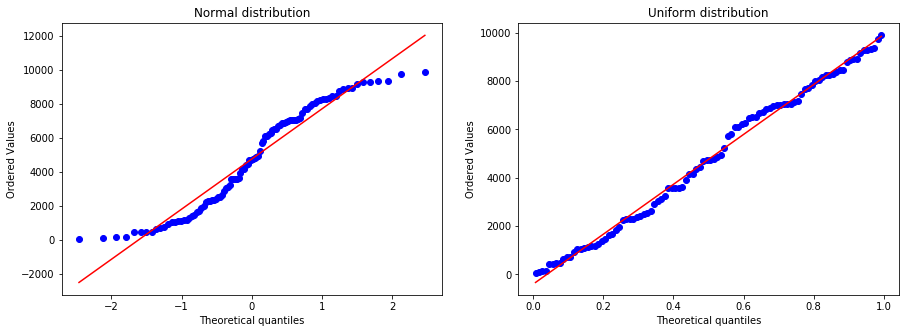

In [115]:
plot_prob_grids(draw1)

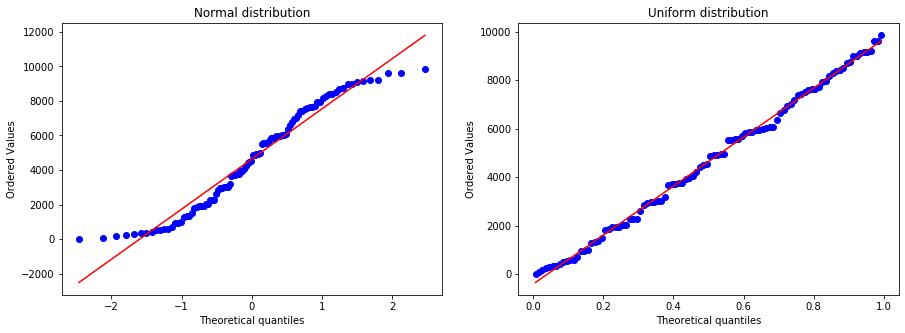

In [116]:
plot_prob_grids(draw2)

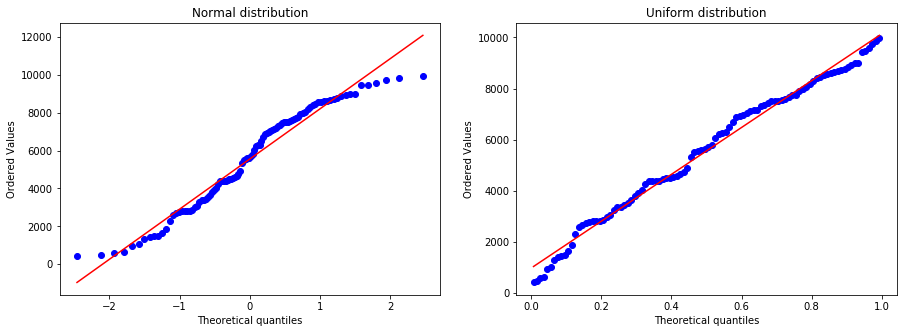

In [117]:
plot_prob_grids(draw3)

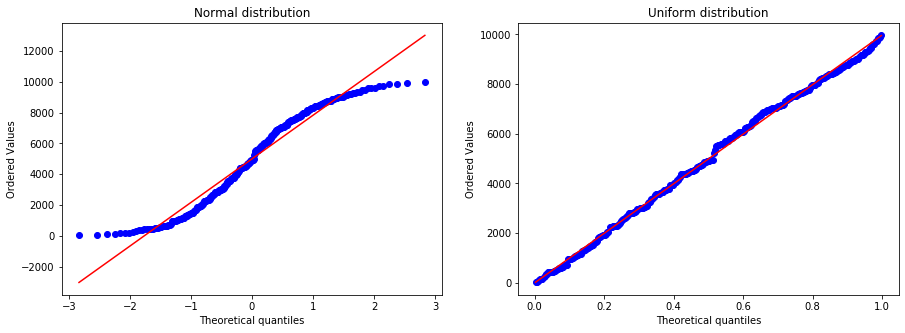

In [118]:
plot_prob_grids(draws)

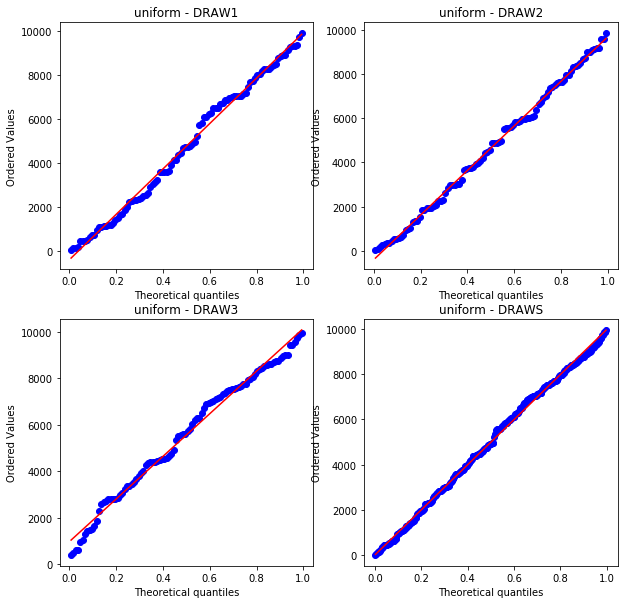

In [64]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

stats.probplot(draw1, dist=stats.uniform, plot=ax[0][0])
stats.probplot(draw2, dist=stats.uniform, plot=ax[0][1])  
stats.probplot(draw3, dist=stats.uniform, plot=ax[1][0])
stats.probplot(draws, dist=stats.uniform, plot=ax[1][1])  

ax[0][0].set_title('uniform - DRAW1')
ax[0][1].set_title('uniform - DRAW2')
ax[1][0].set_title('uniform - DRAW3')
ax[1][1].set_title('uniform - DRAWS')

plt.show()